###**Import de librerías**

In [3]:
import math
import torch
import random
from matplotlib import cm
import scipy.stats as stats
import matplotlib.pyplot as plt

###**2- (30 puntos) Funciones multivariable**


####1. **El vector gradiente**:

Para cada una de las siguientes funciones multivariable: grafique su superficie, calcule el vector gradiente manualmente, evaluelo y grafique el vector unitario o de largo conveniente para su visualización, en la dirección del gradiente para los dos puntos especificados (en la misma figura de la superficie). Finalmente calcule la magnitud de tal vector gradiente en cada punto.

#####**c) (5 puntos)** $z=f\left(x,y\right)=4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1$, evaluación del gradiente en los puntos $P_{0}=\left(2,1\right)$ y $P_{1}=\left(5,7\right)$.

> Dada la función anterior, el gradiente de la primera función estaría dado por las siguientes derivadas parciales:

> $\nabla f\left(x,y\right)=\begin{cases}
\frac{\delta}{\delta x}4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1= & 2e^{2x}+8x+2\\
\frac{\delta}{\delta y}4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1= & 3e^{3y}+10y
\end{cases}$

In [ ]:
def funcion_c(x, y):
  return (4*x**2)+(2*x)+(math.e**(2*x))+(5*(y**2))+(math.e**(3*y))+1

def derivada_funcion_c_1(x):
  return (2*(math.e**(2*x)))+(8*x)+2

def derivada_funcion_c_2(x):
  return (3*(math.e**(3*x)))+(10*x)

> Al evaluar ambos puntos, siendo estos $P_{0}=\left(2,1\right)$ y $P_{1}=\left(5,7\right)$, se obtienen los siguientes resultados:

In [ ]:
gradiente_punto_0 = torch.tensor([derivada_funcion_c_1(2), derivada_funcion_c_2(1), 0])
print("Gradiente evaluado en P0: ", gradiente_punto_0)
print("Magnitud del gradiente evaluado en P0: ", torch.norm(gradiente_punto_0), "\n")

gradiente_punto_1 = torch.tensor([derivada_funcion_c_1(5), derivada_funcion_c_2(7), 0])
print("Gradiente evaluado en P1: ", gradiente_punto_1)
print("Magnitud del gradiente evaluado en P1: ", torch.norm(gradiente_punto_1))

Gradiente evaluado en P0:  tensor([127.1963,  70.2566,   0.0000])
Magnitud del gradiente evaluado en P0:  tensor(145.3096) 

Gradiente evaluado en P1:  tensor([4.4095e+04, 3.9564e+09, 0.0000e+00])
Magnitud del gradiente evaluado en P1:  tensor(3.9564e+09)


> A continuación se presenta el gráfico respectivo: la superficie abarcada por la función en la maya de coordenadas junto con los dos vectores resultantes de la evaluación de cada uno de los dos puntos especificados en el vector gradiente obtenido de las derivadas parciales anteriormente calculadas:

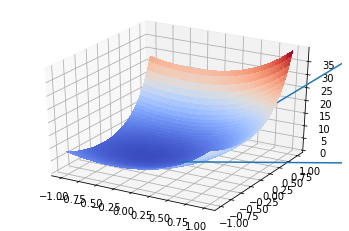

In [ ]:
def evaluar_grandiente(inicio, arrange):
    xs = torch.linspace(arrange[0], arrange[1], steps=256)  # x1
    ys = torch.linspace(arrange[0], arrange[1], steps=256)  # x2
    x, y = torch.meshgrid(xs, ys, indexing='xy')

    #  Se presentan los vectores y la superficie de la función en el resultado
    ax = plt.axes(projection='3d')
    ax.quiver(inicio[0], inicio[1], inicio[2], gradiente_punto_0[0], gradiente_punto_0[1], gradiente_punto_0[2])
    ax.quiver(inicio[0], inicio[1], inicio[2], gradiente_punto_1[0], gradiente_punto_1[1], gradiente_punto_1[2])
    ax.plot_surface(x.numpy(), y.numpy(), funcion_c(x, y).numpy(), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

evaluar_grandiente([0, 0, 0], [-1, 1])

####2. **(10 puntos)** En general, investigue ¿qué es y que indica la matriz Hessiana?

> Sobre las aplicaciones de esta matriz, se pueden citar los siguientes puntos:

* Permite encontrar ya sea máximos o mínimos de funciones multivariable. Para conseguir esto, el procedimiento a seguir consiste de obtener los puntos críticos de la función (igualando a cero el vector gradiente y obteniendo los puntos respectivos del despeje) y operarlos con la matriz Hessiana.

> Una vez obtenido el resultado, la matriz que se consiguió debe ser evaluada bajo el criterio de: definida positiva, definida negativa, indefinida, etc (lo cual puede ser establecido con el Criterio de los valores propios o con el Criterio de Sylvester).

> Dependiendo del tipo de matriz obtenida, así podrá definirse el punto que fue utilizado para el cálculo (máximo, mínimo o un punto neutro).


* También permite saber si una función es cóncava o convexa con respecto a un conjunto de puntos pertenecientes a la función, aplicando nuevamente el concepto de definida positiva, definida negativa, indefinida, etc.

Fuentes utilizadas para cálculo y usos:
* [Matriz Hessiana (o Hessiano)](https://www.matricesydeterminantes.com/matrices/matriz-hessiana-hessiano-2x2-3x3/)
* [La matriz hessiana](https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian)

#####**c) (5 puntos)** $z=f\left(x,y\right)=4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1$

La matriz Hessiana para este ejercicio está dada por las siguiente derivadas de segundo orden:

* $f_{xx}\left(x,y\right)=\frac{\delta}{\delta x}\left(2e^{2x}+8x+2\right)=4e^{2x}+10$

* $f_{xy}\left(x,y\right)=\frac{\delta}{\delta y}\left(2e^{2x}+8x+2\right)=0$

* $f_{yx}\left(x,y\right)=\frac{\delta}{\delta x}\left(3e^{3y}+10y\right)=0$

* $f_{yy}\left(x,y\right)=\frac{\delta}{\delta y}\left(3e^{3y}+10y\right)=9e^{3y}+10$

> Esto, organizado en lo que llamaríamos la matriz Hessiana, resulta en la siguiente matriz:

> $\mathbf{H}f\left(x,y\right)=\left[\begin{array}{cc}
f_{xx}\left(x,y\right) & f_{yx}\left(x,y\right)\\
f_{xy}\left(x,y\right) & f_{yy}\left(x,y\right)
\end{array}\right]=\left[\begin{array}{cc}
4e^{2x}+10 & 0\\
0 & 9e^{3y}+10
\end{array}\right]$

Al evaluar esta matriz con los valores de los dos puntos respectivos, se obtienen las siguientes matrices:

1. Para el punto $P_{0}=\left(2,1\right)$, la matriz resultante está dada por:

> $=\left[\begin{array}{cc}
4e^{4}+10 & 0\\
0 & 9e^{3}+10
\end{array}\right]$

2. Para el punto $P_{0}=\left(5,7\right)$, la matriz resultante está dada por:

> $=\left[\begin{array}{cc}
4e^{10}+10 & 0\\
0 & 9e^{21}+10
\end{array}\right]$

###**3- (50 puntos) Probabilidades: Algoritmo de Maximización de la Esperanza**

A continuación, implemente el algoritmo de maximización de la esperanza (descrito en el material del curso), usando la definición y descripción de las siguientes funciones como base:

####1. **(5 puntos)** Función ***generate_data***:

Implemente la función *generate_data* la cual reciba la cantidad de observaciones unidimensionales total a generar $N$, y los parámetros correspondientes a $K=2$ funciones de densidad Gaussianas. Genere los datos siguiendo tales distribuciones, y retorne tal matriz de datos $X\in\mathbb{R}^{N}$.

* Grafique los datos usando un *scatter plot* junto con las gráficas de la función de densidad de probabilidad, en la misma figura (gráfico).

In [173]:
def get_color(i):
  colors = "rbgcmykw"
  return colors[i % len(colors)]

def init_random_parameters(k:int, expected_mean_std:torch.tensor):
  return generate_parameters(k, expected_mean_std, torch.zeros(k, 2))

def generate_parameters(k:int, rand_range:torch.tensor, base:torch.tensor):
  
  expected_mean = torch.zeros(k).uniform_(rand_range[0][0], rand_range[0][1])
  expected_std = torch.zeros(k).uniform_(rand_range[1][0], rand_range[1][1])
  generated_randoms = torch.t(torch.stack([expected_mean, expected_std]))

  init_masc = torch.where(base == 0, 1, 0)
  row_validation = torch.sum(init_masc, 1).unsqueeze(1)
  masc = torch.where(row_validation == 2, torch.tensor([1, 1]), torch.tensor([0, 0]))
  random_parameters = base + ((masc * generated_randoms))

  return random_parameters

class Random_Data_Generator:
  def __init__(self, n:int, k:int, expected_mean_std:torch.tensor):
    self.n = n
    self.k = k
    self.expected_mean_std = expected_mean_std
  
  def set_default_to_variables(self):
    self.n_per_tensor = self.n // self.k
    self.generated_output = torch.tensor([])
    self.parameters = init_random_parameters(self.k, self.expected_mean_std)

  def generate_data(self, plot_data:bool):
    self.set_default_to_variables()
    self.y = torch.zeros(self.n_per_tensor)
    output = torch.stack(self.generate_data_aux(plot_data))
    self.generated_output = output.view(*output.shape[:0], -1, *output.shape[self.k:])

    if plot_data:
      plt.show()
  
  def generate_data_aux(self, plot_data, curr_dist:int=0):
    n_aux = self.n_per_tensor
    mu = self.parameters[curr_dist][0]
    std = self.parameters[curr_dist][1]

    normal = torch.distributions.Normal(mu, std)
    x = normal.sample((n_aux, 1)).squeeze()
    #x = torch.normal(mean=mu, std=std, size=(1, n_aux))[0]

    if plot_data:
      xcord = torch.linspace(torch.min(x) - std, torch.max(x) + std, 100)
      plt.plot(xcord, stats.norm.pdf(xcord, mu, std))
      plt.scatter(x, self.y, c = get_color(curr_dist))
    
    res_aux = [x]

    if curr_dist + 1 < self.k:
      new_k = curr_dist + 1
      new_data = self.generate_data_aux(plot_data, new_k)
      res_aux.extend(new_data)
    
    return res_aux

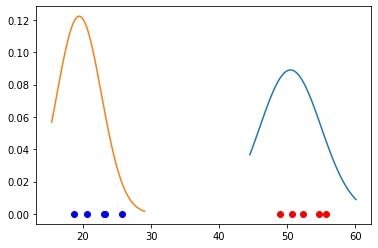

--> La matriz K =  2 tiene las siguientes muestras: 
 tensor([50.7752, 52.3290, 54.6429, 48.9918, 55.6320, 25.7686, 23.2109, 23.0368,
        20.5651, 18.6661]) 

--> Adicionalmente, los parámetros generados para dichas dimensiones son:  
  tensor([[50.4859,  4.4826],
        [19.4456,  3.2639]])


In [174]:
expected_mean_std = torch.tensor([[10.0, 100.0], [3.1, 5.2]])

generator = Random_Data_Generator(10, 2, expected_mean_std)
generator.generate_data(True)

print('--> La matriz K = ', generator.k, 'tiene las siguientes '
      'muestras: \n', generator.generated_output, '\n')

print('--> Adicionalmente, los parámetros generados para dichas dimensiones son: ',
      '\n ', generator.parameters)

####2. **(5 puntos)** Función ***init_random_parameters***:

Implemente la función *init_random_parameters* la cual genere una matriz de $P\in\mathbb{R}^{K\times2}$ dimensiones, con los parámetros de las funciones de densidad Gaussiana generados completamente al azar.

* Muestre un pantallazo donde verifique su funcionamiento correcto con los comentarios asociados.

In [176]:
curr_parameters = init_random_parameters(generator.k, expected_mean_std)
print('--> Parámetros aleatorios calculados para el inicio del algoritmo: \n', curr_parameters)

--> Parámetros aleatorios calculados para el inicio del algoritmo: 
 tensor([[99.2261,  3.9425],
        [99.1964,  3.9636]])


> El objetivo con esta función es calcular la matriz de parámetros de la forma más sencilla y directa posible. Para lograr esto, los únicos límites aplicados para la definición del *aleatorio* es el siguiente rango permitido para calcular los valores aleatorios que estarán en la matriz de salida:

> $[0, curr\_offset + offset]$

> Este rango viene definido enteramente desde la función anterior de *generate_data* donde:

* El límite inferior 0 corresponde con el valor inicial que tiene la variable $curr\_offset$ establecido por defecto en la clase generadora de datos aleatorios.
* El límite superior $curr\_offset + offset$ corresponde a un $offset$ que es definido antes de ejecutar la función de *generate_data* y a un $curr\_offset$ que va incrementando $offset$ con cada dimensión de data que se agrega al dataset final de pruebas.

> De esta forma, se garantiza que los valores aleatorios vayan a caer en un rango de valores que no sea el máximo requerido al momento de generar la muestra. Esto evita valores que se alejen mucho por número muy pequeños o muy grandes.

> Sin embargo, este rango no evita que se caiga en sitios muy aislados de las *islas* generadas por los K grupos de datos, de forma que es muy mejorable para el punto final de esta pregunta.

####3. **(5 puntos)** Función ***calculate_likelihood***:

Implemente la función *calculate_likelihood_gaussian_observations(x_n, mu_k, sigma_k)* la cual calcule la verosimilitud de una observacion específica $x_n$, para una función de densidad Gaussiana con parámetros $µ_k$ y $σ_k$.

* Muestre un pantallazo donde verifique su funcionamiento correcto con los comentarios asociados.

In [177]:
def calculate_likelihood_per_group_of_parameters(parameters:torch.tensor, samples:torch.tensor):
  bpart = (1 / math.sqrt(2 * math.pi * parameters[1]**2))
  fpart = math.e**-(((samples - parameters[0])**2) / (2 * parameters[1]**2))
  
  return bpart * fpart

def calculate_likelihood(parameters:torch.tensor, samples:torch.tensor):
  mean = parameters[:, 0][:, None]
  std = parameters[:, 1][:, None]
  
  bpart = (1 / torch.sqrt(2 * math.pi * std**2))
  fpart = math.e**(-(1/2) * ((samples.repeat(2, 1) - mean) / std)**2)

  return torch.nan_to_num(bpart * fpart)

> Demostración del funcionamiento de la función de likelihood para todos los componentes presentes en el listado de data generada aleatoriamente en comparación con los parámetros generados aleatoriamente.

In [178]:
print('--> Cálculo de la verosimilitud para los pares de parámetros calculados ',
      'aleatoriamente: \n', calculate_likelihood(curr_parameters, generator.generated_output))

--> Cálculo de la verosimilitud para los pares de parámetros calculados  aleatoriamente: 
 tensor([[1.6189e-34, 1.9010e-32, 1.7232e-29, 5.6292e-37, 2.8497e-28, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.9428e-34, 4.3880e-32, 3.6831e-29, 1.4611e-36, 5.9007e-28, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


####4. **(5 puntos)** Función ***calculate_membership_dataset***:

Implemente la función *calculate_membership_dataset(X_dataset,
Parameters_matrix)*, la cual, usando la matriz de parámetros $P$ y la función
anteriormente implementada *calculate_likelihood_gaussian_observation*, defina por cada observación $x_n ∈ X$ la pertenencia o membresía a cada cluster $k = 1, ... K$, en una matriz binaria $M ∈ R^{N×K}$. Retorne tal matriz de membresía $M$.

* Muestre un pantallazo donde verifique su funcionamiento correcto con los comentarios asociados.

In [179]:
def calculate_membership_dataset(parameters:torch.tensor, samples:torch.tensor):
  original = calculate_likelihood(parameters, samples)
  transpose_o = torch.t(original)
  maxvalues = torch.amax(transpose_o, 1)
  return torch.where(original == maxvalues, 1.0, 0.0)

> En el anterior resultado se presentan los resultados obtenidos para cada uno de los grupos de parámetros aplicables para valorar en comparación con el modelo generado aleatoriamente.

In [181]:
def recalculate_parameters(one_hot_vector, samples):
  values_per_membership = one_hot_vector * samples
  transpose = torch.t(values_per_membership)

  n_aux = torch.count_nonzero(transpose, 0)
  mean = torch.sum(values_per_membership, 1) / n_aux

  anti_neg_mean = torch.where(transpose == 0, 1, 0)
  anti_neg_mean = (anti_neg_mean * mean) + transpose

  std = torch.sqrt(torch.sum(torch.t((anti_neg_mean - mean)**2), 1) / n_aux)
  return torch.nan_to_num(torch.t(torch.stack([mean, std])))

Target parameters  tensor([[38.0245,  4.7682],
        [99.5542,  3.5377]])
Parameter on attempt # 0 :  tensor([[12.9508,  4.2584],
        [45.1438,  5.1724]])


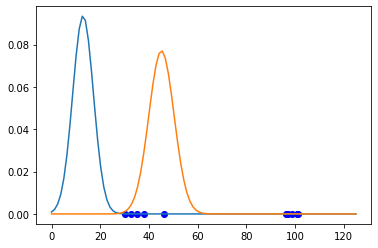

Parameter on attempt # 1 :  tensor([[65.7285,  5.1996],
        [67.6325, 31.5568]])


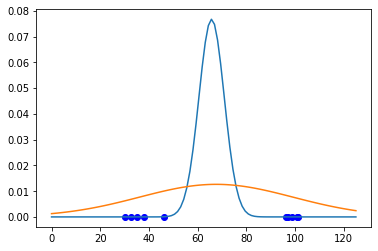

Parameter on attempt # 2 :  tensor([[98.2170,  5.0726],
        [67.6325, 31.5568]])


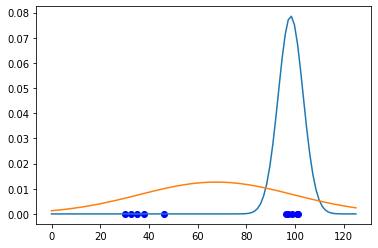

Parameter on attempt # 3 :  tensor([[98.9075,  1.9534],
        [36.3574,  5.6205]])


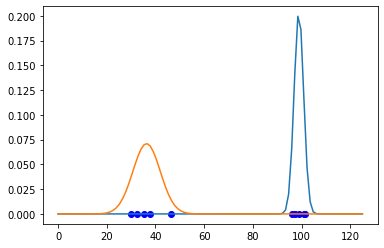

Parameter on attempt # 4 :  tensor([[98.9075,  1.9534],
        [36.3574,  5.6205]])


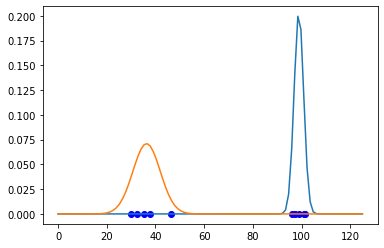

In [183]:
expected_mean_std = torch.tensor([[10.0, 100.0], [3.1, 5.2]])

generator = Random_Data_Generator(10, 2, expected_mean_std)
generator.generate_data(False)
curr_parameters = init_random_parameters(generator.k, expected_mean_std)

print('Target parameters ', generator.parameters)

for i in range(5):
  print('Parameter on attempt #', i, ': ', curr_parameters)
  xcord = torch.linspace(0, 125, 100)
  plt.plot(xcord, stats.norm.pdf(xcord, curr_parameters[0][0], curr_parameters[0][1]))
  plt.plot(xcord, stats.norm.pdf(xcord, curr_parameters[1][0], curr_parameters[1][1]))
  plt.scatter(generator.generated_output, torch.zeros(generator.n), c='b')
  plt.show()

  membership = calculate_membership_dataset(curr_parameters, generator.generated_output)
  curr_parameters = recalculate_parameters(membership, generator.generated_output)
  curr_parameters = generate_parameters(generator.k, expected_mean_std, curr_parameters)